In [18]:
import os
DATA_DIR = 'txtfile'
fname = 'Anne of Green Gables uc1.31822027365162-1560306308.txt'
fname = os.path.join(DATA_DIR, fname)
with open(fname, encoding='utf-8') as f:
    text = f.read()

#remove punctuation
from string import punctuation
no_punct = ''.join([ch for ch in text if ch not in punctuation])

#change text lower
lower_text=no_punct.lower()

#remove stop words
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))   
word_tokens = word_tokenize(lower_text)  
clean_text = [w for w in word_tokens if not w in stop_words]   
clean_text = []  
for w in word_tokens: 
    if w not in stop_words: 
        clean_text.append(w) 
        
#remove additional punctuation
stop=['“', '”','’','—']
filtered_word = [w for w in clean_text if not w in stop]
filtered_word = []
for w in clean_text: 
    if w not in stop: 
        filtered_word.append(w) 

#word frequency
from collections import Counter
freq = Counter(filtered_word)
print(freq.most_common(50))

[('anne', 1341), ('marilla', 779), ('said', 642), ('mrs', 415), ('diana', 388), ('would', 345), ('matthew', 340), ('green', 326), ('think', 308), ('well', 298), ('little', 294), ('one', 294), ('like', 292), ('gables', 285), ('never', 282), ('oh', 275), ('know', 257), ('dont', 239), ('go', 234), ('good', 230), ('going', 224), ('could', 223), ('much', 217), ('time', 182), ('ever', 181), ('girl', 174), ('see', 173), ('back', 169), ('say', 161), ('must', 155), ('miss', 155), ('came', 154), ('went', 153), ('thought', 152), ('things', 146), ('mr', 146), ('school', 145), ('home', 143), ('lynde', 142), ('get', 141), ('eyes', 141), ('thing', 135), ('says', 133), ('come', 131), ('im', 130), ('white', 129), ('look', 124), ('right', 123), ('tell', 121), ('made', 120)]


In [19]:
#Count number of Anne
from nltk.probability import FreqDist
Fdist = FreqDist(filtered_word)
Fdist['anne']

1341

In [20]:
#Count the % of Anne in text
Fdist['anne']/len(word_tokens)*100

1.1615216713439351

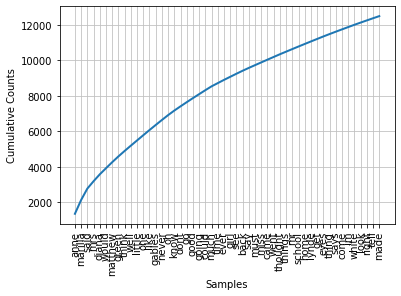

In [21]:
Fdist.plot(50, cumulative=True)

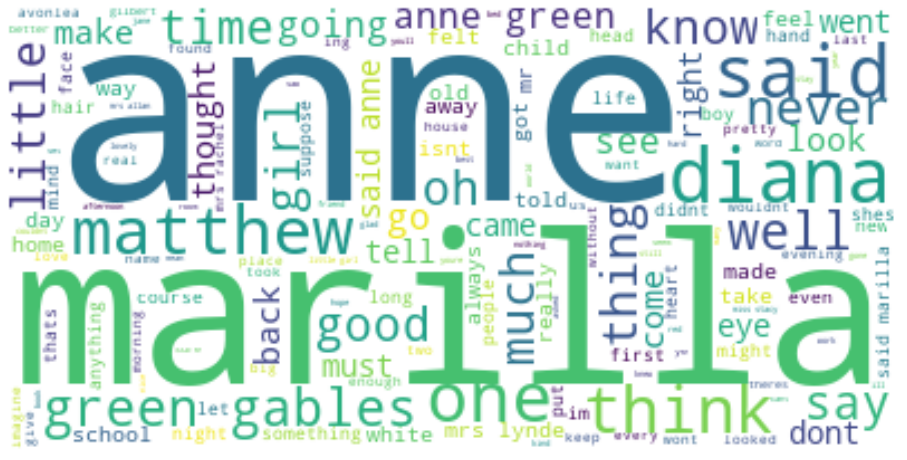

In [22]:
#Make wordcloud
import os
os.path
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
filtered_text=' '.join(filtered_word)
wordcloud = WordCloud(max_words=150,background_color="white").generate(filtered_text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
#save wordclowd
wordcloud.to_file("txtfile/Anne of Green Gable.png")

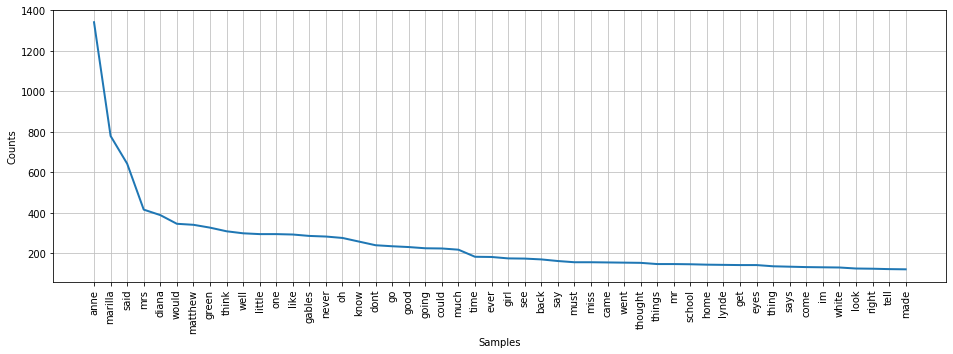

In [24]:
#make word frequency graph
from matplotlib import pyplot as plt
import nltk

freqdist = nltk.FreqDist(filtered_word)
plt.figure(figsize=(16,5))

plt.savefig ("txtfile/Anne of Green Gable_graph.png")
freqdist.plot(50)
plt.show()


In [25]:
#Count number of unique words
len(set(word_tokens))

9190

In [26]:
#Count Number of Words
len(word_tokens)

115452

In [27]:
#Count Vocabulary Density
lexical_diversity = len(set(word_tokens)) / len(word_tokens)
lexical_diversity

0.07960018016145237

In [31]:
# Count how long the words are
fdist = FreqDist(len(w) for w in word_tokens) 
fdist.most_common()

[(3, 24991),
 (4, 23183),
 (2, 18331),
 (5, 12742),
 (1, 11864),
 (6, 8546),
 (7, 7551),
 (8, 3568),
 (9, 2162),
 (10, 1247),
 (11, 693),
 (12, 328),
 (13, 142),
 (14, 74),
 (15, 18),
 (16, 6),
 (17, 3),
 (22, 1),
 (18, 1),
 (19, 1)]

In [32]:
fdist.freq(fdist.max())

0.21646225271108338

In [33]:
#Number of Sentence
len(text.split())

109787

In [38]:
#Average words per sentence
import re
parts = [len(l.split()) for l in re.split(r'[?!.]', text) if l.strip()]
print(sum(parts)/len(parts))

14.592816734640179


In [13]:
#Morphological analysis
import nltk
from nltk import pos_tag
print(nltk.pos_tag(freq))

[('anne', 'NN'), ('green', 'JJ'), ('gables', 'NNS'), ('–0–', 'VBP'), ('chapter', 'NN'), ('mrs', 'NN'), ('rachel', 'NN'), ('lynde', 'NN'), ('surprised', 'VBD'), ('lived', 'JJ'), ('avonlea', 'NN'), ('main', 'JJ'), ('road', 'NN'), ('dipped', 'VBD'), ('little', 'JJ'), ('hollow', 'JJ'), ('fringed', 'VBD'), ('quiet', 'JJ'), ('pool', 'NN'), ('cascade', 'NN'), ('reached', 'VBD'), ('lyndes', 'NNS'), ('wellconducted', 'VBN'), ('stream', 'RB'), ('even', 'RB'), ('time', 'NN'), ('woods', 'NNS'), ('dark', 'JJ'), ('secrets', 'NNS'), ('earlier', 'RBR'), ('course', 'NN'), ('brook', 'NN'), ('intri', 'NN'), ('headlong', 'JJ'), ('cate', 'NN'), ('reputed', 'VBD'), ('old', 'JJ'), ('cuthbert', 'JJ'), ('place', 'NN'), ('alders', 'NNS'), ('ladies', 'NNS'), ('eardrops', 'VBP'), ('traversed', 'VBN'), ('source', 'NN'), ('away', 'RB'), ('back', 'RB'), ('due', 'JJ'), ('regard', 'NN'), ('decency', 'NN'), ('decorum', 'NN'), ('prob', 'NN'), ('could', 'MD'), ('run', 'VB'), ('past', 'JJ'), ('door', 'NN'), ('ably', 'RB')